# Lab 11

This week, we are focusing on gradient descent. Like last week, we wil be using the fake employee dataset with the goal of finding the best parameters for linear regression. The goals for this week are:

0. ~Reviewing grid search and the drawbacks of it~
1. ~Motivate the process for gradient descent~ 
2. Detail the steps of gradient descent
3. Define the learning rate for gradient descent and the impact of it on the speed of the algorithm
4. Implement different versions of gradient descent


### Imports for Today

Let us import the packages that we need for today and the dataset from last time.

In [1]:
## Import block
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 
import seaborn as sns; sns.set()

import numpy as np
from numpy import linalg as LA
import pandas as pd

from sklearn import linear_model

In [22]:
## Functions for later use

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color="lightblue")
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
def place_parameter(p_vec, col, ax=None):
    plt.scatter(p_vec[0],p_vec[1], c=col, marker = "*", s = 100)
    
def draw_parameter_path(p0,p1, col, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color=col)
    ax.annotate('', p1, p0, arrowprops=arrowprops)   
    
def compute_mse(truth_vec, predict_vec):
    return np.mean((truth_vec - predict_vec)**2)
    
def compute_m_partial(in_vals, truth_vec, predict_vec):
    return -2*np.mean(in_vals*(truth_vec-predict_vec))

def compute_b_partial(truth_vec, predict_vec):
    return -2*np.mean(truth_vec-predict_vec)

def adjust_L(current_L, grad_step_num):
    # every five steps decrease L
    if (grad_step_num % 5) == 0:
        
        # Decrease by 0.0001
        current_L = current_L - 0.0001
        
    return current_L
    

In [3]:
## Import Data

employ_data = pd.read_csv("../Lab09-Parameters/lab9data.csv", sep = ",")

## numpy vectors of our inputs
neuro = employ_data[["neuroticism"]].to_numpy()
perform = employ_data[["performance"]].to_numpy()

In [ ]:
# For function testing 




### Where are we? 

Last class, we spent considerable time motivating the role of the gradient descent in stepping towards the minimum. As many of you noticed, our first 500 steps made some progress towards that goal. 

This lab will be a periods of coding punctuated by discussion and brainstorming. 

To begin, copy your code that creates the list of $m$ values, $b$ values, and the MSE associated to each pairing. I've copied the starter code from last lab to help you hone in on which block I mean: 

In [5]:
# Initialize the number of steps you wish to take
# Set your learning rate
n_steps = 500
L = 0.01

# Initialize starting parameters
m = 0
b = 0

# Create empty lists to store values for m, b, and the associated MSE
outm = []
outb = []
outmse = []

# Create an iterative process (ie. a loop) that will take N_STEPS
for stp in range(n_steps):
    # For the current values of m and b: 
    
    # 1. Compute the MSE
    preds = m*neuro + b
    errormse = compute_mse(perform,preds)
    
    # 2. Store m, b, and the associated MSE in the output lists:
    outm.append(m)
    outb.append(b)
    outmse.append(errormse)
    
    # Update m and b by:
    
    # 1. Computing the gradient
    d_m = compute_m_partial(neuro,perform,preds)
    d_b = compute_b_partial(perform,preds)
    
    # Update the values for m and b
    m = m - (L*d_m)
    b = b - (L*d_b)
    
    

### Exploring $L$ 

Fix the value for `n_steps` to **200.** This time, run gradient descent 3 times, each with a different value for L. Limit your options to between 0.00001 to 0.1. Plot the resulting paths again in comparison to the parameters selected by the `sklearn` implementation of linear regression. 

What surprises you? What ideas/questions/concerns do you have? 

In [20]:
# Block for exploration 

# Initialize the number of steps you wish to take
# Set your learning rate
n_steps = 200
L = 0.03

# Initialize starting parameters
m = 0
b = 0

# Create empty lists to store values for m, b, and the associated MSE
outm = []
outb = []
outmse = []

# Create an iterative process (ie. a loop) that will take N_STEPS
for stp in range(n_steps):
    # For the current values of m and b: 
    
    # 1. Compute the MSE
    preds = m*neuro + b
    errormse = compute_mse(perform,preds)
    
    # 2. Store m, b, and the associated MSE in the output lists:
    outm.append(m)
    outb.append(b)
    outmse.append(errormse)
    
    # Update m and b by:
    
    # 1. Computing the gradient
    d_m = compute_m_partial(neuro,perform,preds)
    d_b = compute_b_partial(perform,preds)
    
    # Update the values for m and b
    m = m - (L*d_m)
    b = b - (L*d_b)
   

Text(0.5, 1.0, 'Parameter Vector space')

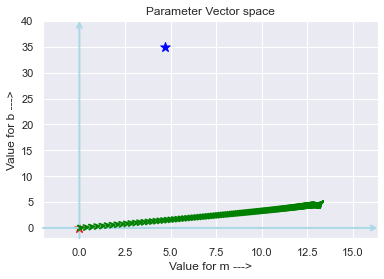

In [10]:
# Plot your results here
# plotting block for you 

fig = plt.figure()

# Set axis limits
xmin = -2
xmax = max(outm) + 3
ymin = -2
ymax = 40

plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])

# Build axes
draw_vector([xmin,0], [xmax,0])
draw_vector([0,ymin], [0,ymax])

# Starting place 
place_parameter([0,0],"red")

place_parameter([4.7,35],"blue")

# plot vectors
for stp in range(n_steps - 1):
    draw_parameter_path([outm[stp], outb[stp]],[outm[stp+1], outb[stp+1]],"green")

# Create grid and labels
plt.grid(True)
plt.xlabel('Value for m --->')
plt.ylabel('Value for b --->')
plt.title('Parameter Vector space')

Text(0.5, 1.0, 'Parameter Vector space')

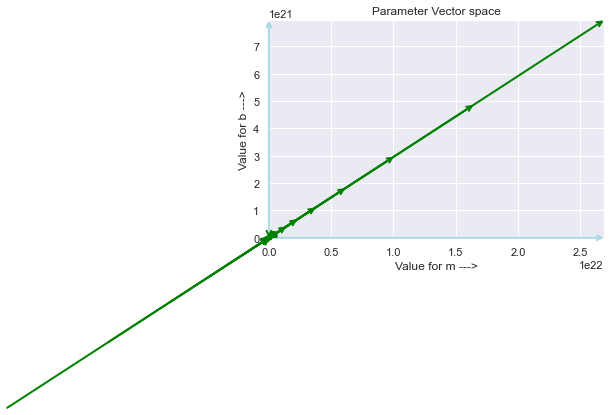

In [19]:
# Block for additional exploration 

# Plot your results here
# plotting block for you 

fig = plt.figure()

# Set axis limits
xmin = -2
xmax = max(outm) + 3
ymin = -2
ymax = max(outb) + 3

plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])

# Build axes
draw_vector([xmin,0], [xmax,0])
draw_vector([0,ymin], [0,ymax])

# Starting place 
place_parameter([0,0],"red")

place_parameter([4.7,35],"blue")

# plot vectors
for stp in range(n_steps - 1):
    draw_parameter_path([outm[stp], outb[stp]],[outm[stp+1], outb[stp+1]],"green")

# Create grid and labels
plt.grid(True)
plt.xlabel('Value for m --->')
plt.ylabel('Value for b --->')
plt.title('Parameter Vector space')

Text(0.5, 1.0, 'Parameter Vector space')

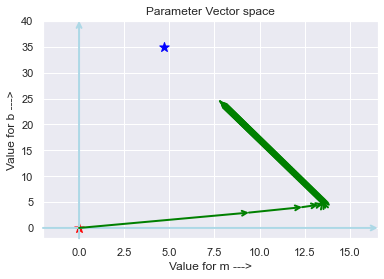

In [21]:
# Block for more exploration 
# Plot your results here
# plotting block for you 

fig = plt.figure()

# Set axis limits
xmin = -2
xmax = max(outm) + 3
ymin = -2
ymax = 40

plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])

# Build axes
draw_vector([xmin,0], [xmax,0])
draw_vector([0,ymin], [0,ymax])

# Starting place 
place_parameter([0,0],"red")

place_parameter([4.7,35],"blue")

# plot vectors
for stp in range(n_steps - 1):
    draw_parameter_path([outm[stp], outb[stp]],[outm[stp+1], outb[stp+1]],"green")

# Create grid and labels
plt.grid(True)
plt.xlabel('Value for m --->')
plt.ylabel('Value for b --->')
plt.title('Parameter Vector space')

In [ ]:
# Block for testing an idea (or two) for Gradient Descent

### Brainstorming session

What do you notice? With your group, try to come up with at least 5 ideas/questions:
* Learning rate interacts with the gradient, how it changes directions
* In the terrible example, the gradient doesn't seem to be getting smaller. Not getting near the truth parameter
* L value that makes the steps converge to basically 0, you have arrived! (So please stop stepping)
* When L is really small, you have to take lots of steps. When L is really big, you can step over where you want to go
* 

## Considerations in Gradient Descent

We have two big considerations in gradient descent: 1) the size of the step that we are taking, and 2) the number of steps that we are taking.

The first is governed in part by the **learning rate** which we have denoted as $L$. The learning rate effectively controls how much of an effect the gradient has on the parameter update. The second -- like the number of iterations within $k$-means -- is a bit more subtle, requiring an examination of **stopping conditions.** 

### Learning Rate + Step Size

There are many ways to approach the learning rate and step size: 

0. Enforce a consistent step size by shrinking the gradient vector to be of length one and keeping a consistent learning rate.
1. We could take an adaptative approach that is related to how many steps the algorithm has taken. That is, gradient descent could take bigger steps at the beginning of the path and then take increasingly smaller ones as it moves on. 

While easy to state the intuition of this second option, there are many ways that one could do this:
* Decrease the value of $L$ with each step of the gradient descent either linearly or exponetially
* Decrease the value of $L$ in a stepwise fashion every few steps 

Choose one of these approaches to the learning rate and sketch out how you would like to code this. Then with your group, implement one approach for varying L as the helper function `adjust_L` in the function block. 

*Aside:* [This page](https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1) develops and expands the above ideas. 

#### Adjusting $L$ in Gradient Descent

Now let's incorporate your helper function into your version of gradient descent. I've copied an edited version of the above starter code below.

Apply this implementation to our employee information. Then chart the path your gradient descent took and again compare it to the parameter values found by the `sklearn` implementation of linear regression. 

In [ ]:
# Scratch block

In [26]:
# Block for exploration 

# Initialize the number of steps you wish to take
# Set your learning rate
n_steps = 200
L = 0.01

# Initialize starting parameters
m = 0
b = 0

# Create empty lists to store values for m, b, and the associated MSE
outm = []
outb = []
outmse = []

# Create an iterative process (ie. a loop) that will take N_STEPS
for stp in range(n_steps):
    # For the current values of m and b: 
    
    # 1. Compute the MSE
    preds = m*neuro + b
    errormse = compute_mse(perform,preds)
    
    # 2. Store m, b, and the associated MSE in the output lists:
    outm.append(m)
    outb.append(b)
    outmse.append(errormse)
    
    # Update m and b by:
    
    # 1. Computing the gradient
    d_m = compute_m_partial(neuro,perform,preds)
    d_b = compute_b_partial(perform,preds)
    
    # Update the values for m and b
    m = m - (L*d_m)
    b = b - (L*d_b)
   
    
    # Update learning rate
    L = adjust_L(L,stp)
    
    

In [24]:
# m and b as given by sklearn: 

# 1. Define the model: 
sk_line = linear_model.LinearRegression()

# 2. Fit the model to our data: 
sk_mod = sk_line.fit(neuro, perform)

# 3. Extract coefficients:
m_sk = sk_mod.coef_
b_sk = sk_mod.intercept_

Text(0.5, 1.0, 'Parameter Vector space')

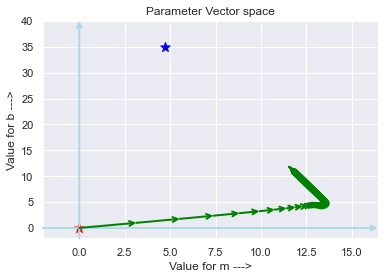

In [27]:
# Your plot of the path given by Gradient Descent 
#                      with varying learning rate

# Block for more exploration 
# Plot your results here
# plotting block for you 

fig = plt.figure()

# Set axis limits
xmin = -2
xmax = max(outm) + 3
ymin = -2
ymax = 40

plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])

# Build axes
draw_vector([xmin,0], [xmax,0])
draw_vector([0,ymin], [0,ymax])

# Starting place 
place_parameter([0,0],"red")

place_parameter([m_sk,b_sk],"blue")

# plot vectors
for stp in range(n_steps - 1):
    draw_parameter_path([outm[stp], outb[stp]],[outm[stp+1], outb[stp+1]],"green")

# Create grid and labels
plt.grid(True)
plt.xlabel('Value for m --->')
plt.ylabel('Value for b --->')
plt.title('Parameter Vector space')

### Number of steps (or GD Stopping conditions)

Gradient descent at its core is a series of steps, but we have to say when we've taken enough steps. There are two considerations when determining that number. From a computational point of view, we also want to limit the maximum number of steps. However, we want to take enough steps that we reach the minimum, but not so many that we by-pass that minimum. 

In terms of testing to see if we have reached the minimum, let us recall a bit of calculus. Consider a one-dimensional curve, ie. one that you can draw on paper with your pencil. Draw $x$ and $y$ axes for reference. 

Now find a minima, and lay your pencil down such that the side of the pencil (ie. neither "end" of the pencil) touches the curve in one place. Notice that your pencil is parallel to the $x$ axis, or as we say, it's _flat._ Your pencil is a physical representative of the derivative. If we were to do something similar for an evaluation surface, we would use a board in place of the pencil. In this higher dimensional version, the board will be parallel to the parameter plane. 

When the derivative flattens, the rate of changes are close to 0. So encoding this arrival at a "minima" is equivalent to checking the size of the gradient, or checking to see when the length of the gradient is close to zero. 

We balance these consideration with two stopping conditions:
1. We can set a hard limit on how many steps we want to take
2. When the (length of the) gradient becomes small enough

These stopping conditions feel very similar to those we encountered for $k$-means, in that the first limits the number of iterations and the second does a quick examination of the most recent progress that the algorithm has made. 

We will add these stopping conditions in two phases, checking the paths against the parameter values found by the `sklearn` implementation of linear regression. 

**_Note:_** To compute the length of a vector, you can either use:
* `norm` within the linear algebra submodule (`linalg`) of `numpy`
* The fact that $|\nabla f| = \sqrt{\nabla f \cdot \nabla f}$, where $\nabla f$ denotes the gradient of the function $f$. In this case $\nabla f = [\textrm{partial with respect to m},\textrm{partial with respect to b}]$.

We add these stopping conditions in waves. Again, I'll be copying previous code shells to give you a starting point 

In [ ]:
# Adding a hard limit (ie. the max number of steps)

# Gradient Descent with varying L and a max-number of steps

# Initialize the max number of steps you wish to take
max_steps = ???

# Initialize starting parameters
m = ??
b = ??

# Initialize L 
L = ???

# Create empty lists to store values for m, b, and the associated MSE
outm = []
outb = ???
outmse = ???

# Create an iterative process (ie. a loop) that will take N_STEPS
for stp in range(??):
    # For the current values of m and b: 
    
    # 1. Compute the MSE
    preds = ???
    errormse = compute_mse(??,??)
    
    # 2. Store m, b, and the associated MSE in the output lists:
    outm.append(m)
    outb.append(??)
    outmse.??
    
    # Update m and b by:
    
    # 1. Computing the gradient
    d_m = compute_m_partial(???,???,???)
    d_b = ???
    
    # Update the values for m and b
    m = m - (?*d_m)
    b = ??
    
    # Update learning rate
    L = ???
    
    

Did anything substantively change in your implementation above? 

In [ ]:
# Your plot of the path given by Gradient Descent with a maximum number of steps

In [ ]:
# Adding a stopping condition based on the length of the gradient 
# Adding a hard limit (ie. the max number of steps)

# Gradient Descent with varying L and a max-number of steps

# Initialize the max number of steps you wish to take
max_steps = ???

# Initialize starting parameters
m = ??
b = ??

# Initialize L 
L = ???

# Set a tolerance for the smallest you will allow 
# the length of the gradient to be before stopping 
grad_tol = 0.01

# Create empty lists to store values for m, b, and the associated MSE
outm = []
outb = ???
outmse = ???

# Create an iterative process (ie. a loop) that will take N_STEPS
for stp in range(??):
    # For the current values of m and b: 
    
    # 1. Compute the MSE
    preds = ???
    errormse = compute_mse(??,??)
    
    # 2. Store m, b, and the associated MSE in the output lists:
    outm.append(m)
    outb.append(??)
    outmse.??
    
    # Update m and b by:
    
    # 1. Computing the gradient
    d_m = compute_m_partial(???,???,???)
    d_b = ???
    
    # Compute the length of the gradient
    norm_grad = ??
    
    # If the length of the gradient is small enough, stop iterating
    if norm_grad < ???:
        break
        
    # Update the values for m and b
    m = m - (?*d_m)
    b = ??
    
    # Update learning rate
    L = ???

In [ ]:
# Your plot of the path given by Gradient Descent with:
#        1. a maximum number of steps AND
#        2. length of the gradient 

## Gradient descent

Let us put all these pieces and implement gradient descent for linear regression with two stopping conditions and an option to vary the learning rate (or not!). Your implementation should be a function that takes in the following arguments: 
1. Your input variable for regression
2. Your output variable for regression
3. The max number of steps
4. A flag allowing for one to vary (or not) the learning rate

Your implementation should **return** just the the values for $m$ and $b$ that gradient descent last computes before being stopped by a stopping condition

Apply your implementation to our employee information. Then chart the path your gradient descent algorithm took and again compare it to the parameter values found by the `sklearn` implementation of linear regression. 

In [ ]:
# Scratch block

In [ ]:
# Your implementation of Gradient Descent as a function 


In [ ]:
# Your plot of the path given by Gradient Descent

## Different flavors of Gradient Descent

Last time we talked about the number of MSE computations for grid search. Clearly gradient descent lowers the number of MSE computations, but within each MSE computation, there are also a number of computations dictated by the size of the dataset. 

Our dataset has 1000 employees. For each computation of MSE for our example, how many arithmatic operations occur? Think about the _order_ of operations as you do this. Try to express your number in terms of $n_o$ the number of observations, $n_v$ the number of variables, and/or the $n_p$ the number of parameters.  

When you have a number, consult with at least one member of your group. 

### Stochastic Gradient Descent 

Stochastic Gradient Descent (SGD) attempts to overcome the number of computations within the MSE by using just one randomly chosen datapoint for each step of the gradient descent. The gradient descent that we implemented earlier is also called _batch gradient descent_ because it consults a _batch_ of data, instead of just one datapoint, in the decision of where to step. 

Create an implementation of stochastic gradient descent, where for each step, you randomly select one datapoint to act in place of the dataset. This means that you are *only using one* data point for computing **both** MSE and for computing the gradient. Before you get started, a few hints and warnings:
* You might want to start with copying your code from above
* Be careful to **not overwrite** the dataset when you select your random point
* You may want to use `np.random.shuffle()` to randomize the data before selecting one at a time. 


Apply your implementation to our employee information. Then chart the path your stochastic gradient descent took in one color and the path your batch gradient descent took in a second color. Compare both paths to the parameter values found by the `sklearn` implementation of linear regression. 

*Aside:* In the most precise version of SGD, we use each datapoint exactly once before repeating any of the data. Each pass over full dataset is called an *epoch.*

In [ ]:
# Scratch Block

In [ ]:
# Your implementation of Stochastic Gradient Descent


In [ ]:
# Your plot of the paths given by Stochastic and (Full) Gradient Descents

### Mini-Batch Gradient Descent

Mini-Batch Gradient Descent is the compromise between batch and stochastic gradient descent using small collections of the data in each step, instead of using all of the data or using just one data point. Mini-batch takes *batches* of $n_b$ datapoints in each step of the gradient descent. 

Create an implementation of mini-batch gradient descent, where you set the size of the batches (that is the value of $n_b$), and where for each step, you randomly select $n_b$ datapoint to act in place of the dataset. Before you get started, a few hints and warnings:
* You might want to start with copying your code from above
* Be careful to **not overwrite** the dataset when you select your random point
* Again, you may want to see use `np.random.shuffle()`  


Apply your implementation to our employee information. Then chart the path your mini-batch gradient descent took in one color and the path your batch gradient descent took in a second color. Compare both paths to the parameter values found by the `sklearn` implementation of linear regression. 


*Aside:* In the most precise version of Mini-batch, we parcel the data into batches, and then use each batch exactly once before repeating any of the batches. Just as with SGD, each pass over full dataset is called an *epoch.*

In [ ]:
# Scratch Block

In [ ]:
# Your implementation of Mini-batch Gradient Descent


In [ ]:
# Your plot of the paths given by Mini-Batch Gradient Descents

### Next week

A deeper look at the training and testing phases. 

### Final Thoughts

To finish up this lab, create a plot with both your stochastic and mini-batch gradient descent paths compared to the best values of $m$ and $b$ according to the linear regression from `sklearn`. Share your plot in a post on **#lab11_submission** channel on slack and note which path seems better to you.  

If your have questions from this lab, post them to #lab_questions with the same preamble (i.e. starting with **Lab11**). If you have the same question, please use one of the emoji's to upvote the question. If you would like to answer someone's question, please use the thread function. This will tie your answer to their question. 

#### Resources consulted 

0. _Doing Data Science: Straight talk from the frontline_ by C. O'Neil & R. Schutt (2014)
1. [BATCH GRADIENT DESCENT VS STOCHASTIC GRADIENT DESCENT](https://www.bogotobogo.com/python/scikit-learn/scikit-learn_batch-gradient-descent-versus-stochastic-gradient-descent.php)
2. [Gradient descent algorithms and adaptive learning rate adjustment methods](https://towardsdatascience.com/gradient-descent-algorithms-and-adaptive-learning-rate-adjustment-methods-79c701b086be)
3. [Learning Rate Schedules and Adaptive Learning Rate Methods for Deep Learning](https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1)
4. [Stochastic Gradient Descent on Wikipedia](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)
5. [Gradient Descent Lecture notes by Ryan Tibshirani](https://www.stat.cmu.edu/~ryantibs/convexopt/lectures/grad-descent.pdf)
6. [norm helpfile in numpy](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linalg.norm.html)
6. [Notation for grad](https://tex.stackexchange.com/questions/219951/laplaces-equation-symbol)